# Scikit-Learn库--决策树和随机森林

### 决策树实例

In [1]:
import numpy as np
# import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
from sklearn.datasets import load_iris
from sklearn import tree
import pydot 

iris = load_iris()
clf = tree.DecisionTreeClassifier()
clf = clf.fit(iris.data, iris.target)
dot_data = tree.export_graphviz(clf, out_file="temptree.dot",
                                feature_names=iris.feature_names,
                                class_names=iris.target_names,
                                filled=True, rounded=True,
                                special_characters=True)


dot_file=r'.\temptree.dot'
graph = pydot.graph_from_dot_file(dot_file)[0]  

In [2]:
%matplotlib inline
from IPython.display import Image
#写到pdf文件
#graph.write_pdf("iris1.pdf")

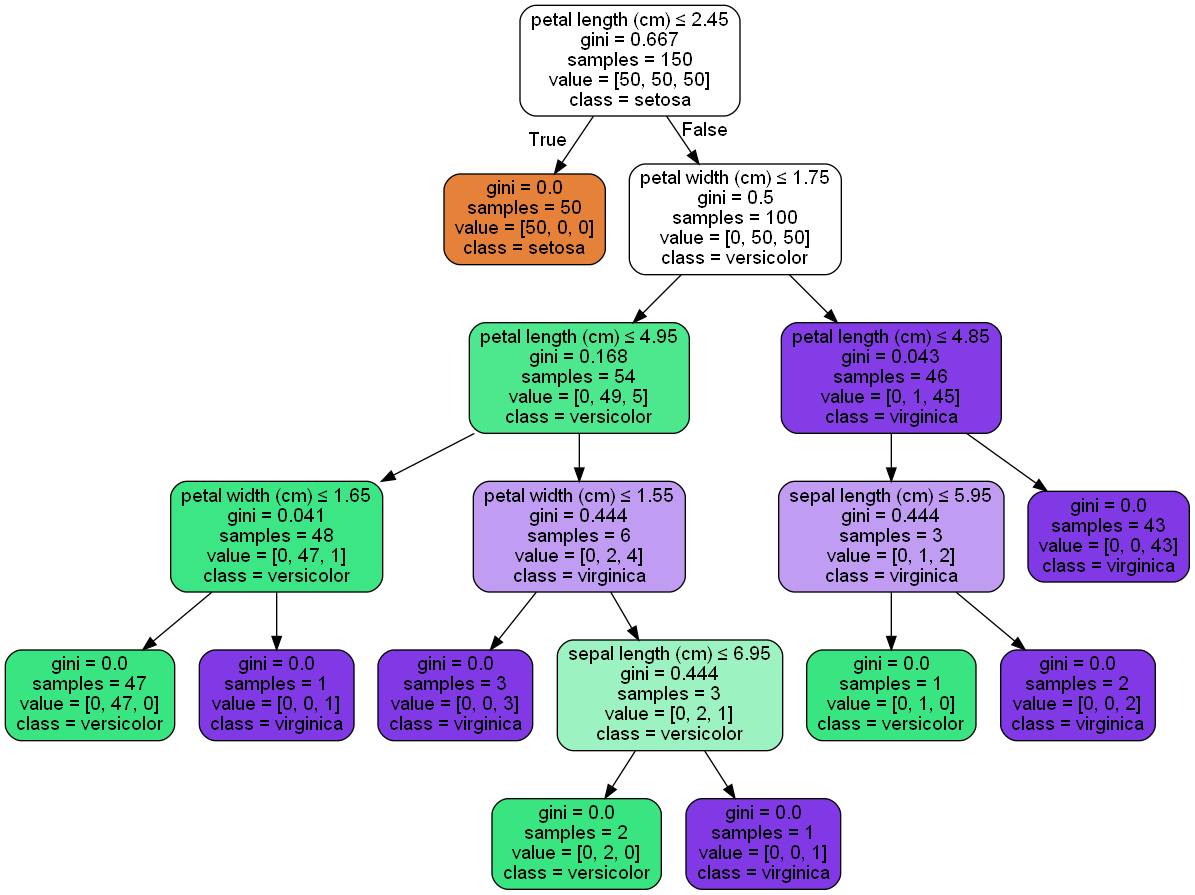

In [3]:
Image(graph.create_png())

## DecisionTreeClassifier

### 决策树的算法

+ 连续特征
+ 离散特征
+ 树的生长算法
+ 剪枝

### scikit-learn 决策树算法类库 

scikit-learn决策树算法类库内部的实现是使用了调优过的CART树算法，既可以做分类，又可以做回归。分类决策树的类对应的是DecisionTreeClassifier，而回归决策树的类对应的是DecisionTreeRegressor。两者的参数定义几乎完全相同。


DecisionTreeClassifier 参数调参的注意点

 
参数 |	DecisionTreeClassifier 
-----|-----
特征选择标准criterion |	可以使用"gini"或者"entropy"，前者代表基尼系数，后者代表信息增益。一般来说使用默认值基尼系数"gini"就可以了，即CART算法。除非你更喜欢类似ID3、C4.5的最优特征选择方法。 
特征划分点选择标准splitter |	可以使用"best"或者"random"。前者在特征的所有划分点中找出最优的划分点。后者是随机的在部分划分点中找局部最优的划分点。默认值"best"适合样本量不大的时候，而如果样本数据量非常大，此时决策树构建推荐"random"。
划分时考虑的最大特征数max_features |	 可以使用很多种类型的值，默认是"None"，意味着划分时考虑所有的特征数；如果是"log2"意味着划分时最多考虑 $\log_2 N$个特征；如果是"sqrt"或者"auto"意味着划分时最多考虑$\sqrt{N}$个特征。如果是整数，代表考虑的特征绝对数。如果是浮点数，代表考虑特征百分比，即考虑（百分比$\times$N）取整后的特征数。其中N为样本总特征数。一般来说，如果样本特征数不多，比如小于50，我们用默认值"None"就可以了，如果特征数非常多，我们可以灵活使用刚才描述的其它取值来控制划分时考虑的最大特征数，以控制决策树的生成时间。
决策树最大深度max_depth |	决策树的最大深度，默认可以不输入，如果不输入的话，决策树在建立子树的时候不会限制子树的深度。一般来说，数据少或者特征少的时候可以不管这个值。如果模型样本量多，特征也多的情况下，推荐限制这个最大深度，具体的取值取决于数据的分布。常用的可以取值10-100之间。
内部节点再划分所需最小样本数min_samples_split |	这个值限制了子树继续划分的条件，如果某节点的样本数少于min_samples_split，则不会继续再尝试选择最优特征来进行划分。默认是2，如果样本量不大，不需要管这个值。如果样本量非常大，则推荐增大这个值。样本量有10万左右，建立决策树时，min_samples_split的参考值为10。
叶子节点最少样本数min_samples_leaf |	这个值限制了叶子节点最少的样本数，如果某叶子节点数目小于样本数，则会和兄弟节点一起被剪枝。默认值是1，可以输入最少的样本数的整数，或者最少样本数占样本总数的百分比。如果样本量不大，不需要管这个值。如果样本量非常大，则推荐增大这个值。10万样本时min_samples_leaf的参考值为5。
叶子节点最小的样本权重和min_weight_fraction_leaf |	这个值限制了叶子节点所有样本权重和的最小值，如果小于这个值，则会和兄弟节点一起被剪枝。默认值是0，就是不考虑权重问题。一般来说，如果较多样本有缺失值，或者分类树样本的分布类别偏差很大，就会引入样本权重。
最大叶子节点数max_leaf_nodes |	通过限制最大叶子节点数，可以防止过拟合，默认是"None”，即不限制最大的叶子节点数。如果增加了该限制，算法会建立在最大叶子节点数内最优的决策树。如果特征不多，可以不考虑这个值，但是如果特征非常多的话，可以加以限制，具体的值可以通过交叉验证得到。
类别权重class_weight |	指定样本各类别的权重，主要是为了防止训练集某些类别的样本过多，导致训练的决策树过于偏向这些类别。这里可以自己指定各个样本的权重或者用"balanced"，如果使用"balanced"，则算法会自己计算权重，样本量少的类别所对应的样本权重会高。当然，如果你的样本类别分布没有明显的偏倚，则可以不管这个参数，选择默认值"None"即可。  
节点划分最小不纯度min_impurity_split |	这个值限制了决策树的增长，如果某节点的不纯度（基尼系数，信息增益，均方差，绝对差）小于这个阈值，则该节点不再生成子节点，即为叶子节点 。
数据是否预排序presort |	这个值是布尔值，默认值是False即不进行预排序。一般来说，如果样本量少或者限制了一个深度很小的决策树，设置为true可以让划分点选择更加快，加快决策树的建立。如果样本量太大的话，反而没有什么好处。问题是样本量少的时候，速度本来就不慢，所以这个值一般不理它就可以了。
 

  DecisionTreeRegressor 参数差别

+ 特征选择标准criterion 

可以使用"mse"或者"mae"，前者是均方差，后者是和均值之差的绝对值之和。 

+ 回归中没有改参数：类别权重class_weight 

# 优化和评估模型

+ 评估树模型的效果，并进行优化
  + 准确率： $\frac{1}{N}\sum_{i=1}^N{I(\hat{y_i}=y_i)}$
    + from sklearn.metrics import accuracy_score
    +  accuracy_score(y_true, y_pred, normalize=True, sample_weight=None)
  +  查准率和查全率      
    +  classification_report
    +  from sklearn.metrics import precision_recall_curve (两分类问题适用)
    +  precision_recall_curve(y_true, probas_pred, pos_label=None, sample_weight=None)
  + F1 score  
    查准率和查全率调和平均($\frac{n}{\sum_{i=1}^n \frac1{x_i}}$),达到1表示模型最好，0表示最差。 

    $F1 = 2 \times\frac{ (precision \times recall)}{  (precision + recall)}$

  + ROC 曲线（Receiver operating characteristic (ROC)）,       FPR  TPR cruve

In [4]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import classification_report

### 数据分割为training data 和 test data
  + train_test_split(X,y,test_size=0.33,random_state=10)
  


In [5]:
from sklearn.model_selection import train_test_split
X_train,X_test, y_train, y_test = train_test_split(iris.data, iris.target,test_size=0.33,random_state=10)  
print(X_train.shape)
print(X_test.shape)

(100, 4)
(50, 4)


###  数据标准化
  + 机器学习中通常对各变量进行标准化，使得数据的均值和方差一致
  + preprocessing.scale(X_train)
 

In [6]:
from sklearn import preprocessing
X_train_scaled = preprocessing.scale(X_train)
#print(X_trained_scaled)

print(X_train_scaled.mean(axis=0))
print(X_train_scaled.std(axis=0))

[-1.98285832e-15  1.62370117e-15 -3.81916720e-16  2.46469511e-16]
[1. 1. 1. 1.]


+ 因为我们需要对训练数据和检验数据就行同样的标准化，通常采用 Transformer API.
+ 它可以实现整个拟合、检验、预测过程中使用同样的标准化,形如：
   +  利用训练数据生成transformer
   +  利用transformer标准化训练数据
   +  利用transformer标准化测试数据（用同样的均值和方差） 

In [7]:
scaler = preprocessing.StandardScaler().fit(X_train) 
X_train_scaled = scaler.transform(X_train) 
print(X_train_scaled.mean(axis=0))
print(X_train_scaled.std(axis=0)) 
X_test_scaled = scaler.transform(X_test) 
print(X_test_scaled.mean(axis=0))
print(X_test_scaled.std(axis=0))

[-1.98285832e-15  1.62370117e-15 -3.81916720e-16  2.46469511e-16]
[1. 1. 1. 1.]
[ 0.04139649 -0.12036909  0.11120199  0.14330561]
[1.01388863 0.95418181 0.95965796 0.98947412]


+ 注意标准化检验数据看起来并不是均值0和方差1？
+ 不过在建模过程中我们可以用如下的方式，使得标准化过程简化。

In [8]:
from sklearn.pipeline import Pipeline
pipeline = Pipeline([("scal",preprocessing.StandardScaler()), ('clf',tree.DecisionTreeClassifier(criterion='gini'))]) 

+ pipeline
+ 定义一个依次执行的序列，前面是若干transfer,最后一个是需要估计的模型

### 超参数

+ 有两种参数，模型参数和超参数，模型参数可以通过数据直接估计到，比如回归中的系数，决策树中的结点划分条件.
+ 而超参数是描述模型的结构，通常需要在估计模型参数前指定，比如决策树中的树深度，叶结点个数等。

In [9]:
pipeline.get_params()

{'memory': None,
 'steps': [('scal', StandardScaler(copy=True, with_mean=True, with_std=True)),
  ('clf',
   DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                          max_depth=None, max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, presort='deprecated',
                          random_state=None, splitter='best'))],
 'verbose': False,
 'scal': StandardScaler(copy=True, with_mean=True, with_std=True),
 'clf': DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                        max_depth=None, max_features=None, max_leaf_nodes=None,
                        min_impurity_decrease=0.0, min_impurity_split=None,
                        min_samples_leaf=1, min_samples_split=2,
                        min_weight_fraction_leaf=0.0, pr

+ 我们可以指定若干组超参数

 
        parameters = {  
        'clf__max_depth': (2, 3, 4,5),  
        'clf__min_samples_split': ( 2,3,5),  
        'clf__min_samples_leaf': (1, 2,3)  
        }  
  
  
+ 然后利用  GridSearchCV  函数进行模型选择
+ 什么是CV

### CV

+ 交叉验证法，能更稳健地训练、评估和选择模型方法
 
+ 步骤

    1. 将数据等分为k等分(folds) (通常 k=10).
    2. 利用前 k-1 分(folds)训练样本，得到一个模型 (e.g. the first 9 folds).
    3. 利用最后一份评估该模型 (e.g. the 10th fold).
    4. 重复 (2) 和 (3) k 次, 每次使用不同的部分检验样本.
    5. 平均所有k个模型，得到最终的模型评估.
![K-Fold Cross-Validation diagram, courtesy of Wikipedia](figures/K-fold_cross_validation_EN.jpg)
<center>K-Fold Cross-Validation diagram, courtesy of Wikipedia</center>

### 机器学习中为什么需要CV方法?

+ 比如在训练树模型时，超参数可能包括

        parameters = {  
        'clf__max_depth': (2, 3, 4,5),  
        'clf__min_samples_split': ( 2,3,5),  
        'clf__min_samples_leaf': (1, 2,3)  
        }  
    
+ 我们如何选择这些超参数呢？

+ 通过CV方法，我们可以仅仅利用训练数据(training data)就可以评估具有不同超参数的模型。 

+ 这样在训练选择数据的时候，我们没有使用test data。当选出最终的模型后，在利用test data 评估最终模型，这样得到的结果相对客观。 

+ 有时候我们也可以利用这个独立的test data 做不同统计模型的选择，比如决策树或者回归方法。 


+ 使用pipeline GridSearch数据标准化，模拟拟合和优化

In [10]:
from sklearn.model_selection import GridSearchCV
hyperparameters = { 
    'clf__max_depth': (2, 3, 4,5),  
    'clf__min_samples_split': ( 2,3,5),  
    'clf__min_samples_leaf': (1, 2,3)
}  
clf = GridSearchCV(pipeline, hyperparameters, cv=10,n_jobs=1,verbose=1)
clf.fit(X_train, y_train)

Fitting 10 folds for each of 36 candidates, totalling 360 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 360 out of 360 | elapsed:    0.9s finished


GridSearchCV(cv=10, error_score=nan,
             estimator=Pipeline(memory=None,
                                steps=[('scal',
                                        StandardScaler(copy=True,
                                                       with_mean=True,
                                                       with_std=True)),
                                       ('clf',
                                        DecisionTreeClassifier(ccp_alpha=0.0,
                                                               class_weight=None,
                                                               criterion='gini',
                                                               max_depth=None,
                                                               max_features=None,
                                                               max_leaf_nodes=None,
                                                               min_impurity_decrease=0.0,
                                      

In [11]:
clf.best_params_

{'clf__max_depth': 3, 'clf__min_samples_leaf': 1, 'clf__min_samples_split': 2}

In [12]:
print ('最佳效果：%0.3f' %clf.best_score_)  
print('最优参数')  
print(clf.best_params_)
predictions = clf.predict(X_test)  

最佳效果：0.950
最优参数
{'clf__max_depth': 3, 'clf__min_samples_leaf': 1, 'clf__min_samples_split': 2}


In [13]:
print(classification_report(y_test, predictions)) 
predictions

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        15
           1       1.00      0.68      0.81        19
           2       0.73      1.00      0.84        16

    accuracy                           0.88        50
   macro avg       0.91      0.89      0.88        50
weighted avg       0.91      0.88      0.88        50



array([1, 2, 0, 1, 0, 1, 2, 1, 0, 1, 1, 2, 1, 0, 0, 2, 2, 0, 0, 0, 2, 2,
       2, 0, 1, 0, 1, 1, 2, 2, 1, 1, 2, 2, 2, 0, 2, 2, 2, 2, 0, 0, 1, 0,
       2, 0, 2, 2, 2, 2])

In [14]:
besttree=clf.best_estimator_.get_params()["clf"]
besttree.fit(X_train, y_train)
dot_data = tree.export_graphviz(besttree, out_file="temptree.dot",
                                feature_names=iris.feature_names,
                                class_names=iris.target_names,
                                filled=True, rounded=True,
                                special_characters=True)

dot_file=r'.\temptree.dot'
graph = pydot.graph_from_dot_file(dot_file)[0]  

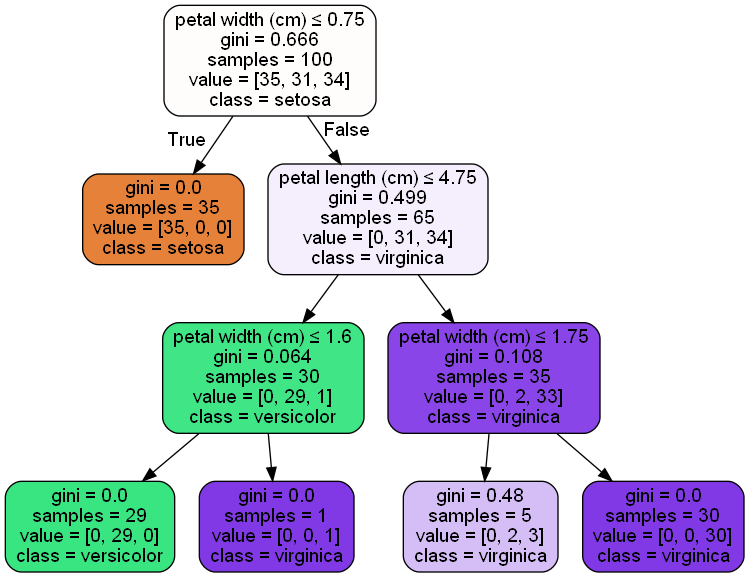

In [15]:
Image(graph.create_png())

In [16]:
predictions = besttree.predict(X_test)  
print(classification_report(y_test, predictions)) 

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        15
           1       1.00      0.79      0.88        19
           2       0.80      1.00      0.89        16

    accuracy                           0.92        50
   macro avg       0.93      0.93      0.92        50
weighted avg       0.94      0.92      0.92        50



## 支付违约，例子

[UCI Machine Learning Repository: default of credit card clients Data Set](http://archive.ics.uci.edu/ml/datasets/default+of+credit+card+clients)

### Data Set Information:

This research aimed at the case of customersâ€™ default payments in Taiwan and compares the predictive accuracy of probability of default among six data mining methods. From the perspective of risk management, the result of predictive accuracy of the estimated probability of default will be more valuable than the binary result of classification - credible or not credible clients. Because the real probability of default is unknown, this study presented the novel â€œSorting Smoothing Methodâ€ to estimate the real probability of default. With the real probability of default as the response variable (Y), and the predictive probability of default as the independent variable (X), the simple linear regression result (Y = A + BX) shows that the forecasting model produced by artificial neural network has the highest coefficient of determination; its regression intercept (A) is close to zero, and regression coefficient (B) to one. Therefore, among the six data mining techniques, artificial neural network is the only one that can accurately estimate the real probability of default.

### Attribute Information:

This research employed a binary variable, default payment (Yes = 1, No = 0), as the response variable. This study reviewed the literature and used the following 23 variables as explanatory variables:  
X1: Amount of the given credit (NT dollar): it includes both the individual consumer credit and his/her family (supplementary) credit.  
X2: Gender (1 = male; 2 = female).  
X3: Education (1 = graduate school; 2 = university; 3 = high school; 4 = others).  
X4: Marital status (1 = married; 2 = single; 3 = others).  
X5: Age (year).  
X6 - X11: History of past payment. We tracked the past monthly payment records (from April to September, 2005) as follows:  
X6 = the repayment status in September, 2005;  
X7 = the repayment status in August, 2005;  
. . .;  
X11 = the repayment status in April, 2005.  
The measurement scale for the repayment status is: -1 = pay duly; 1 = payment delay for one month; 2 = payment delay for two months; . . .; 8 = payment delay for eight months; 9 = payment delay for nine months and above.  
X12-X17: Amount of bill statement (NT dollar).  
X12 = amount of bill statement in September, 2005;  
X13 = amount of bill statement in August, 2005;  
. . .;  
X17 = amount of bill statement in April, 2005.  
X18-X23: Amount of previous payment (NT dollar).   
X18 = amount paid in September, 2005;   
X19 = amount paid in August, 2005;   
. . .;   
X23 = amount paid in April, 2005.

## Relevant Papers:

Yeh, I. C., & Lien, C. H. (2009). The comparisons of data mining techniques for the predictive accuracy of probability of default of credit card clients. Expert Systems with Applications, 36(2), 2473-2480.

 

+  K-nearest neighbor classifirs (KNN)
+  Logistic regression (LR)
+  Discriminant analysis (DA)
+  Naive Bayesian classifir (NB)
+  Artificial neural networks (ANNs)
+  Classifiation trees (CTs)


### 建模过程

In [17]:
data = pd.read_excel("data/default of credit card clients.xls", skiprows=[0])
data.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [18]:
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import classification_report
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
import pydot 
%matplotlib inline
from IPython.display import Image
y = data['default payment next month']
X = data.drop(["ID",'default payment next month'], axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                  test_size=0.2, 
                                                    random_state=123, 
                                                    stratify=y)
pipeline = Pipeline([('clf',tree.DecisionTreeClassifier(criterion='gini'))]) 
hyperparameters = { 
    'clf__max_depth': (10, 15, 20),  
    'clf__min_samples_split': ( 2,10,20),  
    'clf__min_samples_leaf': (1,5,10),
    'clf__max_features': (5,10)
}  
clf = GridSearchCV(pipeline, hyperparameters, cv=10,n_jobs=1,verbose=1)
clf.fit(X_train, y_train)
besttree=clf.best_estimator_.get_params()["clf"]
besttree.fit(X_train, y_train)



Fitting 10 folds for each of 54 candidates, totalling 540 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 540 out of 540 | elapsed:  1.4min finished


DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=10, max_features=10, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=10,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [19]:
dot_data = tree.export_graphviz(besttree, out_file="temptree.dot",
                                 feature_names=X_train.columns,
                                filled=True, rounded=True,
                                special_characters=True)

dot_file=r'.\temptree.dot'
graph = pydot.graph_from_dot_file(dot_file)[0]

graph.write_pdf("default.pdf")

In [20]:
predictions = besttree.predict(X_test)  
print(classification_report(y_test, predictions)) 
print(besttree.feature_importances_)

              precision    recall  f1-score   support

           0       0.84      0.93      0.88      4673
           1       0.61      0.37      0.46      1327

    accuracy                           0.81      6000
   macro avg       0.72      0.65      0.67      6000
weighted avg       0.79      0.81      0.79      6000

[0.02868991 0.01002507 0.01118026 0.00607935 0.02259622 0.24024334
 0.03944637 0.29040875 0.00588362 0.03605623 0.00452083 0.02679171
 0.02708242 0.02278606 0.02473076 0.02723001 0.02339314 0.06616092
 0.0122733  0.02517834 0.01205576 0.01606443 0.02112322]


In [21]:
#Mean cross-validated score of the best_estimator
print('Best Score: {}'.format(clf.best_score_))

Best Score: 0.811375


In [22]:
predictions_prob = besttree.predict_proba(X_test)  
precision,recall,thresholds=precision_recall_curve(y_test,predictions_prob[:,1])
from sklearn.metrics import roc_curve 
fpr, tpr, thresholds = roc_curve(y_test, predictions_prob[:,1])

In [23]:
y_test[1:10],predictions_prob[:,1]

(29444    1
 12392    1
 5591     0
 7282     0
 18238    0
 18318    0
 22939    0
 16704    0
 25910    0
 Name: default payment next month, dtype: int64,
 array([0.        , 0.13253012, 0.58461538, ..., 0.14476021, 0.63789474,
        0.1588785 ]))

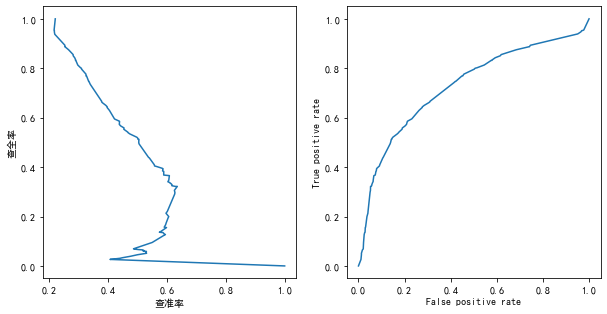

In [24]:
#import matplotlib.pyplot as plt
plt.rcParams['font.sans-serif']=['SimHei'] 
plt.rcParams['axes.unicode_minus']=False  

 
fig = plt.figure(figsize=(10, 5))
ax1 = fig.add_subplot(121,  ylabel="查全率",xlabel="查准率")
ax1.plot(precision,recall)
ax2 = fig.add_subplot(122,  ylabel="True positive rate",xlabel="False positive rate")
ax2.plot(fpr,tpr)

# 随机森林 random forrest

+ 利用重抽样方法抽取不同样本，学习简单的决策树，然后将若干简单的决策树联合起来进行决策的方法
+ 实例分析. 预测某地(墨西哥)人年收入属于如下哪个区间：
    1. Below $40,000

    2. $40,000 – 150,000

    3. More than $150,000

+ 可以利用如下信息：

    1. Age ,     2. Gender,    3. Highest educational qualification,    4. Working in Industry,     5. Residence in Metro/Non-metro

+ 我们用随机森林预测具有下面特征的人的收入：

    1. Age : 35 years , 2, Gender : Male , 3. Highest Educational Qualification : Diploma holder, 4. Industry : Manufacturing, 5. Residence : Metro
 

随机森林中每一棵树都可以看做是一棵CART（分类回归树），这里假设森林中有5棵CART树，总特征个数N=5，我们取m=1（这里假设每个CART树对应一个不同的特征）。


CART 1 : Variable Age

![](data\rf1.png)

CART 2 : Variable Gender

![](data\rf2.png)

CART 3 : Variable Education

![](data\rf3.png)

CART 4 : Variable Residence

![](data\rf4.png)

CART 5 : Variable Industry

![](data\rf5.png)

+ 我们可以利用这5个决策树模型的预测均值来计算每个工资水平的概率. 

        1. Age : 35 years , 2, Gender : Male , 3. Highest Educational Qualification : Diploma holder, 4. Industry : Manufacturing, 5. Residence : Metro
        
+ 每个决策树模型给出的预测如下： 

![](data\DF.png)

+ 因此如果我们用平均概率来预测，则可以进行如下预测：这个人的收入层次70%是一等，大约24%为二等，6%为三等，如果要给出确定的预测，可以预测该人属于一等收入层次（小于$40,000）。

In [25]:
from sklearn.ensemble import RandomForestClassifier
parameter_gridsearch = {
                 'max_depth' : [5,7],  #depth of each decision tree
                 'n_estimators': [50,40],  #count of decision tree      
       
                 }
randomforest = RandomForestClassifier()  
gridsearch = GridSearchCV(randomforest,            
                               param_grid=parameter_gridsearch
                                )


gridsearch.fit(X_train,y_train)  
 
parameters = gridsearch.best_params_
print(parameters)
print('Best Score: {}'.format(gridsearch.best_score_))
predictions = gridsearch.predict(X_test)  
print(classification_report(y_test, predictions))  

{'max_depth': 7, 'n_estimators': 50}
Best Score: 0.821125
              precision    recall  f1-score   support

           0       0.84      0.96      0.89      4673
           1       0.69      0.34      0.46      1327

    accuracy                           0.82      6000
   macro avg       0.76      0.65      0.67      6000
weighted avg       0.80      0.82      0.80      6000



In [26]:
predictions_prob1 = gridsearch.predict_proba(X_test)  
precision1,recall1,thresholds=precision_recall_curve(y_test,predictions_prob1[:,1])
from sklearn.metrics import roc_curve 
fpr1, tpr1, thresholds = roc_curve(y_test, predictions_prob1[:,1])

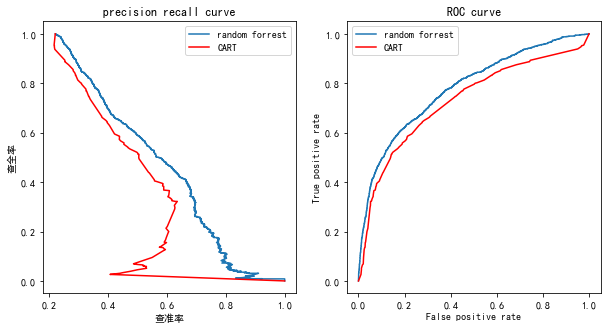

In [27]:
plt.figure(figsize=(10, 5))
plt.subplot(121,  ylabel="查全率",xlabel="查准率",title="precision recall curve")
plt.plot(precision1,recall1,label="random forrest")
plt.plot(precision,recall,color="red",label="CART")
plt.legend(loc="best")
plt.subplot(122,  ylabel="True positive rate",xlabel="False positive rate",title="ROC curve")
plt.plot(fpr1,tpr1,label="random forrest")
plt.plot(fpr,tpr,color="red",label="CART")
plt.legend(loc="best")

## 例子，指数

[UCI Machine Learning Repository: Dow Jones Index Data Set](http://archive.ics.uci.edu/ml/datasets/Dow+Jones+Index)

### Attribute Information:

quarter: the yearly quarter (1 = Jan-Mar; 2 = Apr=Jun).  
stock: the stock symbol (see above)  
date: the last business day of the work (this is typically a Friday)  
open: the price of the stock at the beginning of the week  
high: the highest price of the stock during the week  
low: the lowest price of the stock during the week  
close: the price of the stock at the end of the week  
volume: the number of shares of stock that traded hands in the week  
percent_change_price: the percentage change in price throughout the week  
percent_chagne_volume_over_last_wek: the percentage change in the number of shares of
stock that traded hands for this week compared to the previous week  
previous_weeks_volume: the number of shares of stock that traded hands in the previous week  
next_weeks_open: the opening price of the stock in the following week  
next_weeks_close: the closing price of the stock in the following week  
percent_change_next_weeks_price: the percentage change in price of the stock in the
following week  
days_to_next_dividend: the number of days until the next dividend  
percent_return_next_dividend: the percentage of return on the next dividend


## Best Python Libraries/Packages for Finance and Financial Data Scientists
 
[Best Python Libraries/Packages for Finance and Financial Data Scientists - Finance Train](https://financetrain.com/best-python-librariespackages-finance-financial-data-scientists/)

Finance professionals involved in data analytics and data science make use of R, Python and other programming languages to perform analysis on a variety of data sets. Python has been gathering a lot of interest and is becoming a language of choice for data analysis. Python also has a very active community which doesn’t shy from contributing to the growth of python libraries. If you search on Github, a popular code hosting platform, you will see that there is a python package to do almost anything you want.

This article provides a list of the best python packages and libraries used by finance professionals, quants, and financial data scientists.

+ Numerical, Statistical & Data Structures

    + numpy – NumPy is the fundamental package for scientific computing with Python. It is a first-rate library for numerical programming and is widely used in academia, finance, and industry. NumPy specializes in basic array operations.  
    + scipy – SciPy supplements the popular Numeric module, Numpy. It is a Python-based ecosystem of open-source software for mathematics, science, and engineering. It is also used intensively for scientific and financial computation based on Python  
    + pandas – The pandas library provides high-performance, easy-to-use data structures and data analysis tools for the Python programming language. Pandas focus is on the fundamental data types and their methods, leaving other packages to add more sophisticated statistical functionality  
    + quantdsl – Quand DSL is domain specific language for quantitative analytics in finance and trading. Quant DSL is a functional programming language for modeling derivative instruments.  
    + statistics – This is a built-in Python library for all basic statistical calculations

+ Financial Instruments

    + pyfin – Pyfin is a python library for performing basic options pricing in python
    + vollib – vollib is a python library for calculating option prices, implied volatility and greeks using Black, Black-Scholes, and Black-Scholes-Merton. vollib implements both analytical and numerical greeks for each of the three pricing formulae.
    + QuantPy – A framework for quantitative finance In python. Some current capabilities: Portfolio class that can import daily returns from Yahoo, Calculation of optimal weights for Sharpe ratio and efficient frontier, and event profiler
    + ffn – A financial function library for Python. ffn is a library that contains many useful functions for those who work in quantitative finance. It stands on the shoulders of giants (Pandas, Numpy, Scipy, etc.) and provides a vast array of utilities, from performance measurement and evaluation to graphing and common data transformations.
    + pynance – PyNance is open-source software for retrieving, analyzing and visualizing data from stock and derivatives markets. It includes tools for generating features and labels for machine learning algorithms.
    + tia – TIA is a toolkit that provides Bloomberg data access, easier pdf generation, backtesting functionality, technical analysis functionality, return analysis and few windows utils.

+ Trading & Backtesting

    +  TA-Lib – TA-Lib is widely used by trading software developers requiring to perform technical analysis of financial market data. It has an open-source API for python.
    + trade – trade is a Python framework for the development of financial applications. A trade app works like a service. The user informs the items he has in stock and a series of subsequent occurrences (purchases, sales, whatsoever) with those or other items. trade then calculates the effects of those occurrences and gives back the new amounts and costs of the items in stock.
    + zipline – Zipline is a Pythonic algorithmic trading library. It is an event-driven system that supports both backtesting and live trading.
    + QuantSoftware Toolkit – Python-based open source software framework designed to support portfolio construction and management. It is built the QSToolKit primarily for finance students, computing students, and quantitative analysts with programming experience.
    + quantitative – Quantitative finance, and backtesting library. Quantitative is an event driven and versatile backtesting library.
    + analyzer – Python framework for real-time financial and backtesting trading strategies
    + bt – bt is a flexible backtesting framework for Python used to test quantitative trading strategies.
    + backtrader – Python Backtesting library for trading strategies
    + pybacktest – Vectorized backtesting framework in Python / pandas, designed to make your backtesting easier. It allows users to specify trading strategies using full power of pandas, at the same time hiding all boring things like manually calculating trades, equity, performance statistics and creating visualizations. Resulting strategy code is usable both in research and production setting.
    + pyalgotrade – PyAlgoTrade is an event driven algorithmic trading Python library. Although the initial focus was on backtesting, paper trading is now possible
    + tradingWithPython – A collection of functions and classes for Quantitative trading
    + pandas_talib – A Python Pandas implementation of technical analysis indicators
    + algobroker – This is an execution engine for algo trading. The idea is that this python server gets requests from clients and then forwards them to the broker API.
    + finmarketpy – finmarketpy is a Python based library that enables you to analyze market data and also to backtest trading strategies using a simple to use API, which has prebuilt templates for you to define backtest.

+ Risk Analysis

    + pyfolio – pyfolio is a Python library for performance and risk analysis of financial portfolios. It works well with the Zipline open source backtesting library.
    + empyrical – Common financial risk and performance metrics. Used by zipline and pyfolio.
    + finance – Financial Risk Calculations. Optimized for ease of use through class construction and operator overload.
    + qfrm – Quantitative Financial Risk Management: awesome OOP tools for measuring, managing and visualizing risk of financial instruments and portfolios.
    + visualize-wealth – A library built in Python to construct, backtest, analyze, and evaluate portfolios and their benchmarks.
    + VisualPortfolio – This tool is used to visualize the performance of a portfolio

+ Time Series

    + ARCH – ARCH and other tools for financial econometrics in Python
    + statsmodels – Python module that allows users to explore data, estimate statistical models, and perform statistical tests.
    + dynts – A statistic package for python with emphasis on time series analysis. Built around numpy, it provides several back-end time series classes including R-based objects via rpy2.
